In [ ]:
import plotly.graph_objects as go

# HODP colors
monochrome_colors = ['#251616', '#760000', '#C63F3F', '#E28073', '#F1D3CF']
primary_colors = ['#C63F3F', '#F4B436', '#83BFCC', '#455574', '#E2DDDB']

# HODP template
theme_hodp = go.layout.Template(
    layout=go.Layout(
        title = {'font':{'size':24, 'family':"Helvetica", 'color':monochrome_colors[0]}, 'pad':{'t':100, 'r':0, 'b':0, 'l':0}},
        font = {'size':18, 'family':'Helvetica', 'color':'#717171'},
        xaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'showline': True,
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'automargin': True
                },
        yaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'showline': True,
                'automargin': True
                },
        legend = {'bgcolor':'rgba(0,0,0,0)', 
                'title':{'font':{'size':18, 'family':"Helvetica", 'color':monochrome_colors[0]}}, 
                'font':{'size':14, 'family':"Helvetica"}, 
                'yanchor':'bottom'
                },
        colorscale = {'diverging':monochrome_colors},
        coloraxis = {'autocolorscale':True, 
                'cauto':True, 
                'colorbar':{'tickfont':{'size':14,'family':'Helvetica'}, 'title':{'font':{'size':18, 'family':'Helvetica'}}},
                }
    )
)

import pandas as pd
import numpy as np
joesdf = pd.read_csv('joes.csv')
ottosdf = pd.read_csv('ottos.csv')
pinodf = pd.read_csv('pinocchios.csv')
jefesdf = pd.read_csv('eljefes.csv')
felipesdf = pd.read_csv('felipes.csv')


joesdf.rename(columns={'time ago (years)': 'time'}, inplace=True)
ottosdf.rename(columns={'time ago (years)': 'time'}, inplace=True)
pinodf.rename(columns={'time ago (years)': 'time'}, inplace=True)
jefesdf.rename(columns={'time ago (years)': 'time'}, inplace=True)
felipesdf.rename(columns={'time ago (years)': 'time'}, inplace=True)

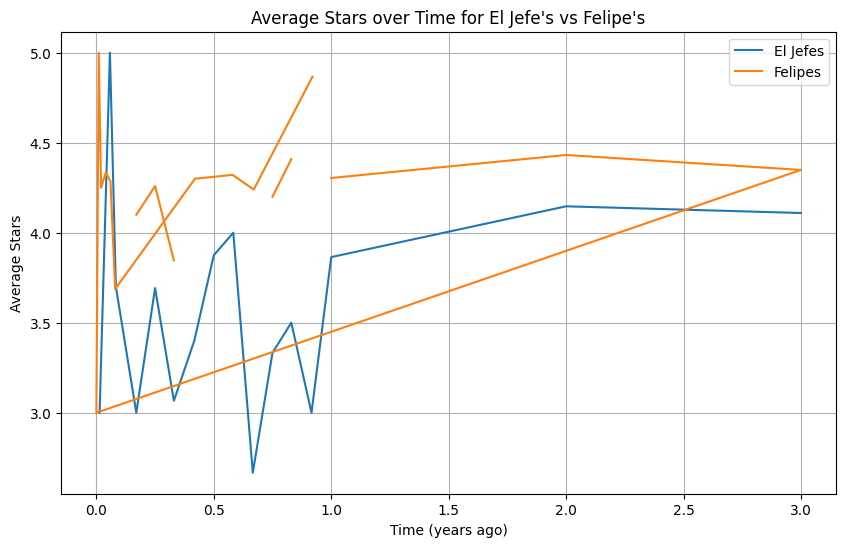

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

filtered_jefesdf = jefesdf[jefesdf['time'] <= 3]
filtered_felipesdf = felipesdf[felipesdf['time'] <= 3]

avg_stars_jefes = filtered_jefesdf.groupby('time')['stars'].mean().reset_index()
filtered_felipesdf['time'] = filtered_felipesdf['time'].round(2)
avg_stars_felipes = filtered_felipesdf.groupby('time')['stars'].mean().reset_index()
merged_data = pd.merge(avg_stars_jefes, avg_stars_felipes, on='time', how='outer', suffixes=('_r1', '_r2'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_data['time'], merged_data['stars_r1'], label='El Jefes')
plt.plot(merged_data['time'], merged_data['stars_r2'], label='Felipes')

# Labeling the graph
plt.xlabel('Time (years ago)')
plt.ylabel('Average Stars')
plt.title("Average Stars over Time for El Jefe's vs Felipe's")
plt.legend()
plt.grid(True)
plt.show()

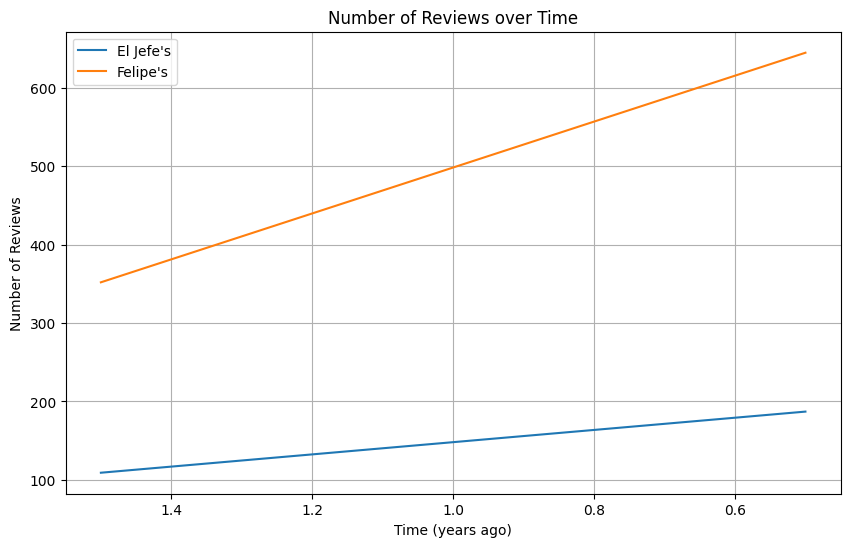

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define  bins
bins = [0, 1, 2]

# Bin data and create a new column for the binned values
jefesdf['time_bin'] = pd.cut(jefesdf['time'], bins)
felipesdf['time_bin'] = pd.cut(felipesdf['time'], bins)

def get_interval_midpoint(interval):
    return (interval.left + interval.right) / 2

jefesdf['time_bin_midpoint'] = jefesdf['time_bin'].apply(get_interval_midpoint)
felipesdf['time_bin_midpoint'] = felipesdf['time_bin'].apply(get_interval_midpoint)

review_count_jefes = jefesdf.groupby('time_bin_midpoint').size().reset_index(name='review_count')
review_count_felipes = felipesdf.groupby('time_bin_midpoint').size().reset_index(name='review_count')

merged_reviews = pd.merge(review_count_jefes, review_count_felipes, on='time_bin_midpoint', how='outer', suffixes=('_jefes', '_felipes'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_reviews['time_bin_midpoint'], merged_reviews['review_count_jefes'], label="El Jefe's")
plt.plot(merged_reviews['time_bin_midpoint'], merged_reviews['review_count_felipes'], label="Felipe's")

plt.gca().invert_xaxis()
plt.xlabel('Time (years ago)')
plt.ylabel('Number of Reviews')
plt.title("Number of Reviews over Time")
plt.legend()
plt.grid(True)
plt.show()


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


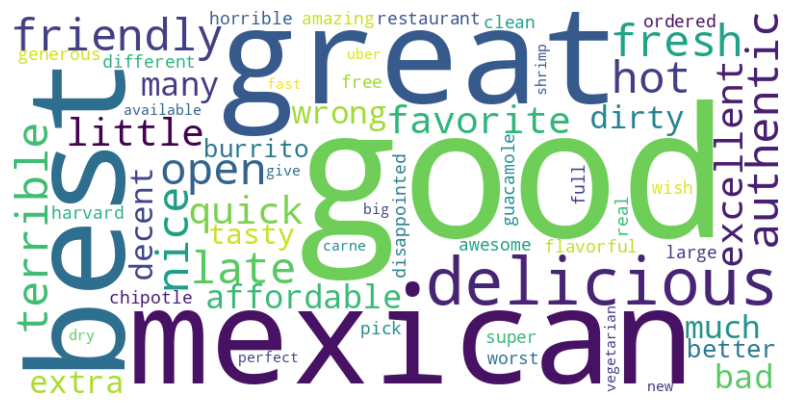

In [ ]:
#jefes wordcloud

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # Download POS tagger

reviews = jefesdf['text'].astype(str)

# Tokenize and remove stop words
stop_words = set(stopwords.words('english'))
stop_words.add('taco')
tokens = []
for review in reviews:
    words = word_tokenize(review)
    words_filtered = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    tagged = pos_tag(words_filtered)
    tokens.extend([word for word, tag in tagged if tag.startswith('JJ')])  # 'JJ' is the POS tag for adjectives

# Count the frequency of each word
word_counts = Counter(tokens)

# Extracting keywords - you can define a threshold or number to limit the list
threshold = 3
keywords = sorted([(word, count) for word, count in word_counts.items() if count > threshold], key=lambda x: x[1], reverse=True)

# Join the keywords into a single string
text = ' '.join([word for word, count in keywords])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


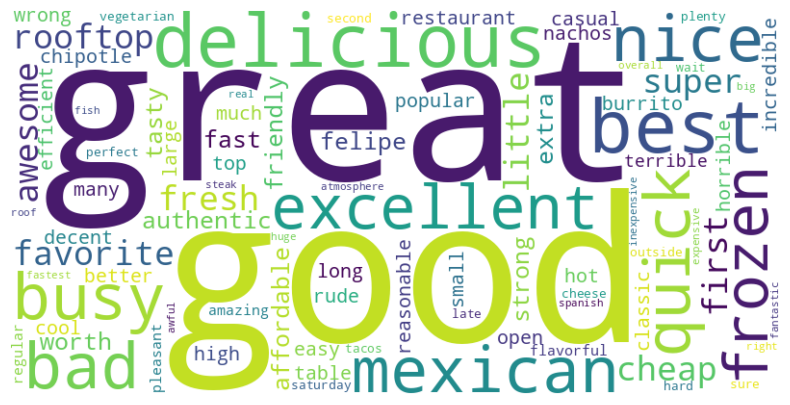

In [ ]:
#jefes wordcloud

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # Download POS tagger

# DataFrame is named df and the column with reviews is named 'reviews'
reviews = felipesdf['text'].astype(str)

# Tokenize and remove stop words
stop_words = set(stopwords.words('english'))
stop_words.add('taco')
tokens = []
for review in reviews:
    words = word_tokenize(review)
    words_filtered = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    tagged = pos_tag(words_filtered)
    tokens.extend([word for word, tag in tagged if tag.startswith('JJ')])  # 'JJ' is the POS tag for adjectives

# Count the frequency of each word
word_counts = Counter(tokens)

# Extracting keywords - you can define a threshold or number to limit the list
threshold = 3
keywords = sorted([(word, count) for word, count in word_counts.items() if count > threshold], key=lambda x: x[1], reverse=True)

# Join the keywords into a single string
text = ' '.join([word for word, count in keywords])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


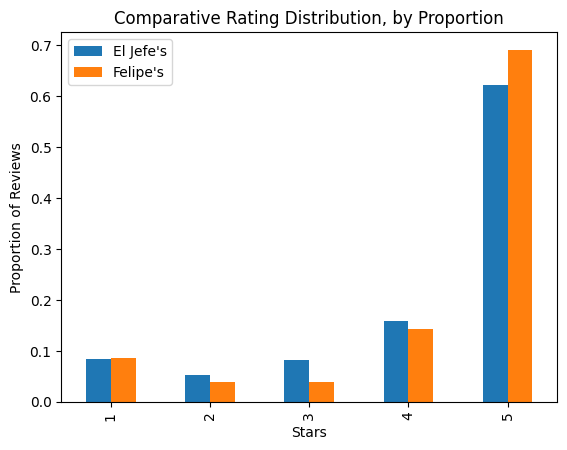

In [ ]:
# Calculate proportions instead of counts
jefesdist = jefesdf['stars'].value_counts(normalize=True).sort_index()
felipesdist = felipesdf['stars'].value_counts(normalize=True).sort_index()

# Combine distributions into a single DataFrame
combined_distribution = pd.DataFrame({"El Jefe's": jefesdist,
                                      "Felipe's": felipesdist})

# Plotting side-by-side
combined_distribution.plot(kind='bar')
plt.title('Comparative Rating Distribution, by Proportion')
plt.xlabel('Stars')
plt.ylabel('Proportion of Reviews')
plt.show()






[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
NEUTRAL     379
POSITIVE    309
NEGATIVE     65
Name: sentiment_type, dtype: int64
NEUTRAL     480
POSITIVE    468
NEGATIVE     92
Name: sentiment_type, dtype: int64


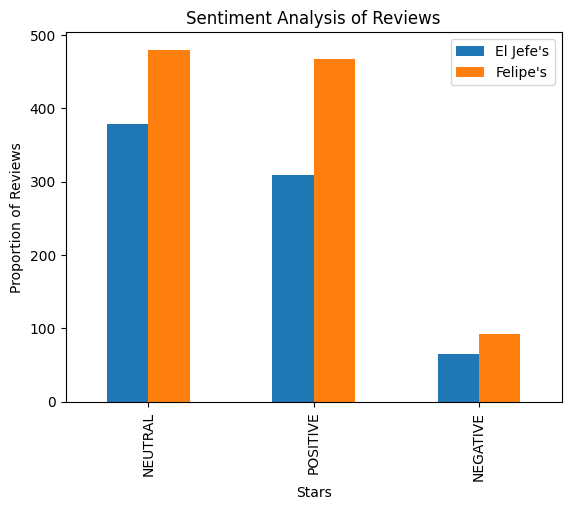

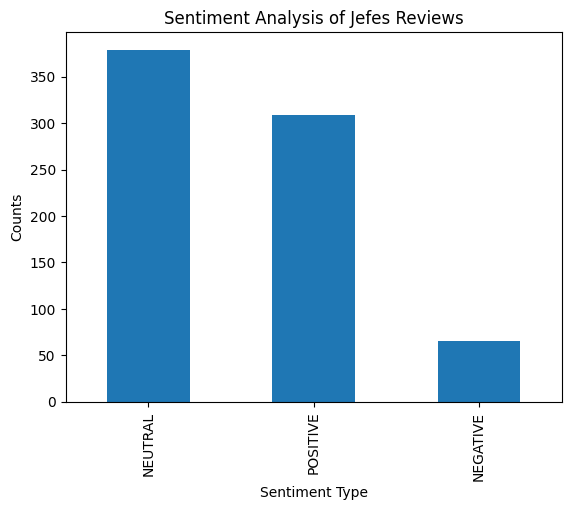

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

jefesreviews = jefesdf['text'].astype(str)
sia = SentimentIntensityAnalyzer()

jefesdf['sentiments'] = jefesreviews.apply(lambda review: sia.polarity_scores(review))
jefesdf['compound'] = jefesdf['sentiments'].apply(lambda d: d['compound'])
jefesdf['sentiment_type'] = ''
jefesdf.loc[jefesdf.compound > 0, 'sentiment_type'] = 'POSITIVE'
jefesdf.loc[jefesdf.compound == 0, 'sentiment_type'] = 'NEUTRAL'
jefesdf.loc[jefesdf.compound < 0, 'sentiment_type'] = 'NEGATIVE'
jefessentiment_counts = jefesdf['sentiment_type'].value_counts()
print(jefessentiment_counts)

felipesreviews = felipesdf['text'].astype(str)

felipesdf['sentiments'] = felipesreviews.apply(lambda review: sia.polarity_scores(review))
felipesdf['compound'] = felipesdf['sentiments'].apply(lambda d: d['compound'])
felipesdf['sentiment_type'] = ''
felipesdf.loc[felipesdf.compound > 0, 'sentiment_type'] = 'POSITIVE'
felipesdf.loc[felipesdf.compound == 0, 'sentiment_type'] = 'NEUTRAL'
felipesdf.loc[felipesdf.compound < 0, 'sentiment_type'] = 'NEGATIVE'
felipessentiment_counts = felipesdf['sentiment_type'].value_counts()
print(felipessentiment_counts)

# Combine distributions into a single DataFrame
combined_sentiment = pd.DataFrame({"El Jefe's": jefessentiment_counts,
                                      "Felipe's": felipessentiment_counts})

# Plotting side-by-side
combined_sentiment.plot(kind='bar')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Stars')
plt.ylabel('Proportion of Reviews')
plt.show()

jefessentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis of Jefes Reviews')
plt.xlabel('Sentiment Type')
plt.ylabel('Counts')
plt.show()



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


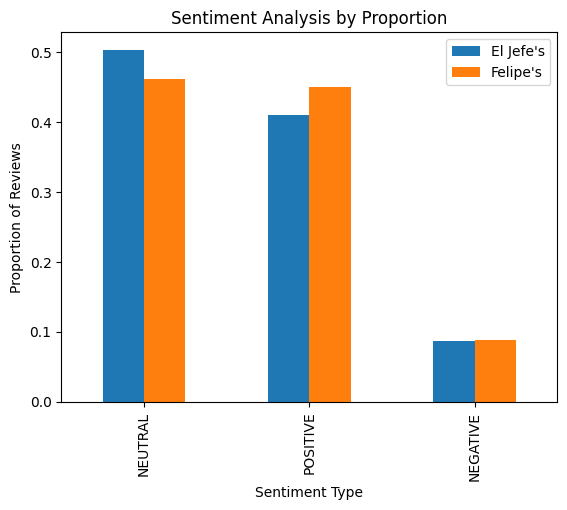

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiments
def calculate_sentiments(df):
    df['sentiments'] = df['text'].astype(str).apply(lambda review: sia.polarity_scores(review))
    df['compound'] = df['sentiments'].apply(lambda d: d['compound'])
    df['sentiment_type'] = ''
    df.loc[df.compound > 0, 'sentiment_type'] = 'POSITIVE'
    df.loc[df.compound == 0, 'sentiment_type'] = 'NEUTRAL'
    df.loc[df.compound < 0, 'sentiment_type'] = 'NEGATIVE'
    return df

# Calculate sentiments for both datasets
jefesdf = calculate_sentiments(jefesdf)
felipesdf = calculate_sentiments(felipesdf)

# Calculate proportions
jefes_proportions = jefesdf['sentiment_type'].value_counts(normalize=True)
felipes_proportions = felipesdf['sentiment_type'].value_counts(normalize=True)

# Combine distributions into a single DataFrame
combined_sentiment = pd.DataFrame({"El Jefe's": jefes_proportions,
                                   "Felipe's": felipes_proportions})

# Plotting side-by-side
combined_sentiment.plot(kind='bar')
plt.title('Sentiment Analysis of Reviews, by Proportion')
plt.xlabel('Sentiment Type')
plt.ylabel('Proportion of Reviews')
plt.show()

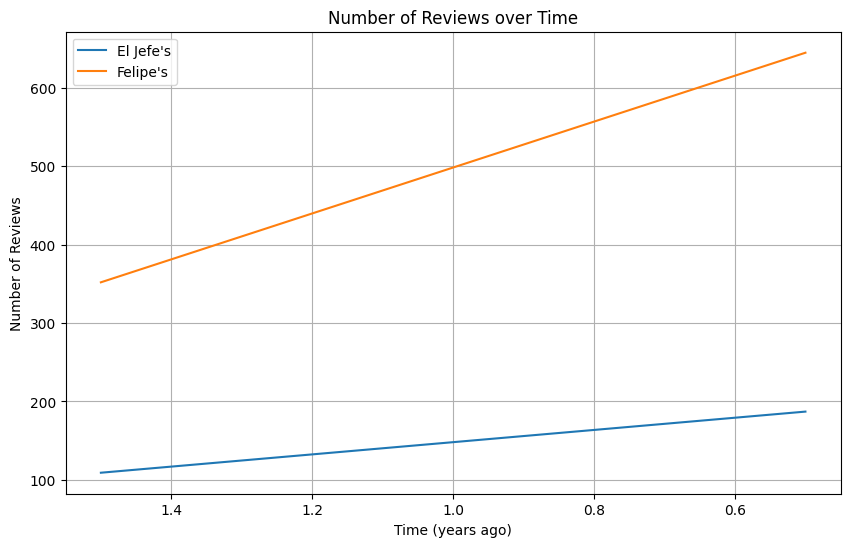

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your bins
bins = [0, 1, 2]

# Bin data and create a new column for the binned values
jefesdf['time_bin'] = pd.cut(jefesdf['time'], bins)
felipesdf['time_bin'] = pd.cut(felipesdf['time'], bins)

def get_interval_midpoint(interval):
    return (interval.left + interval.right) / 2

jefesdf['time_bin_midpoint'] = jefesdf['time_bin'].apply(get_interval_midpoint)
felipesdf['time_bin_midpoint'] = felipesdf['time_bin'].apply(get_interval_midpoint)

review_count_jefes = jefesdf.groupby('time_bin_midpoint').size().reset_index(name='review_count')
review_count_felipes = felipesdf.groupby('time_bin_midpoint').size().reset_index(name='review_count')

merged_reviews = pd.merge(review_count_jefes, review_count_felipes, on='time_bin_midpoint', how='outer', suffixes=('_jefes', '_felipes'))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(merged_reviews['time_bin_midpoint'], merged_reviews['review_count_jefes'], label="El Jefe's")
plt.plot(merged_reviews['time_bin_midpoint'], merged_reviews['review_count_felipes'], label="Felipe's")

plt.gca().invert_xaxis()
plt.xlabel('Time (years ago)')
plt.ylabel('Number of Reviews')
plt.title("Number of Reviews over Time")
plt.legend()
plt.grid(True)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Jefe's Aspect Counts: {'waiting_time': 34, 'staff_behavior': 87, 'cleanliness': 16}
Jefe's Aspect Sentiments: {'waiting_time': 0.15057352941176472, 'staff_behavior': 0.2902402298850575, 'cleanliness': -0.14473750000000002}
Felipe's Aspect Counts: {'waiting_time': 70, 'staff_behavior': 130, 'cleanliness': 6}
Felipe's Aspect Sentiments: {'waiting_time': 0.3413785714285715, 'staff_behavior': 0.2033638461538461, 'cleanliness': 0.38676666666666665}


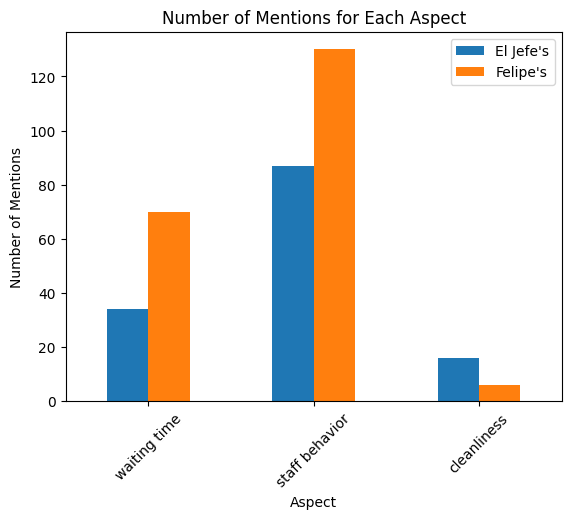

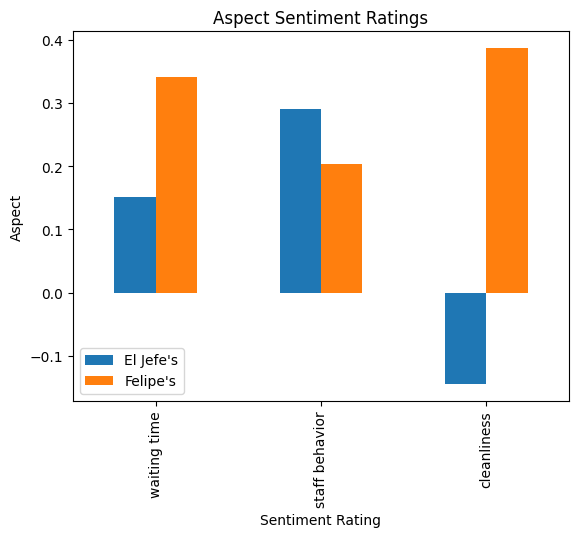

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define your aspect keywords
keywords = {
    'waiting_time': ["wait", "waiting", "long time", "quick", "slow", "minutes"],
    'staff_behavior': ["staff", "service", "waiter", "waitress", "attentive", "rude", "friendly"],
    'cleanliness': ["clean", "dirty", "hygienic", "messy", "spotless", "sanitary"]
}

# Function to analyze aspect mentions
def analyze_aspects(df, keywords):
    sia = SentimentIntensityAnalyzer()
    aspect_counts = {aspect: 0 for aspect in keywords}
    aspect_sentiments = {aspect: [] for aspect in keywords}

    for review in df['text'].astype(str):
        sentences = nltk.sent_tokenize(review)
        for sentence in sentences:
            for aspect, aspect_keywords in keywords.items():
                if any(word in sentence for word in aspect_keywords):
                    aspect_counts[aspect] += 1
                    aspect_sentiments[aspect].append(sia.polarity_scores(sentence)['compound'])

    # Calculate average sentiment for each aspect
    for aspect in aspect_sentiments:
        sentiments = aspect_sentiments[aspect]
        if sentiments:
            aspect_sentiments[aspect] = sum(sentiments) / len(sentiments)
        else:
            aspect_sentiments[aspect] = None

    return aspect_counts, aspect_sentiments

# Analyze aspects for each restaurant
jefes_aspects, jefes_sentiments = analyze_aspects(jefesdf, keywords)
felipes_aspects, felipes_sentiments = analyze_aspects(felipesdf, keywords)

# Print the results
print("Jefe's Aspect Counts:", jefes_aspects)
print("Jefe's Aspect Sentiments:", jefes_sentiments)
print("Felipe's Aspect Counts:", felipes_aspects)
print("Felipe's Aspect Sentiments:", felipes_sentiments)


# Combine distributions into a single DataFrame
combined_aspect_counts = pd.DataFrame({"El Jefe's": jefes_aspects,
                                      "Felipe's": felipes_aspects})

# Rename 'staff_behavior' to 'staff behavior'
combined_aspect_counts = combined_aspect_counts.rename(index={'waiting_time': 'waiting time', 'staff_behavior': 'staff behavior'})

# Plotting side-by-side
combined_aspect_counts.plot(kind='bar')
plt.title('Number of Mentions for Each Aspect')
plt.xlabel('Aspect')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

# Combine distributions into a single DataFrame
combined_sentiments = pd.DataFrame({"El Jefe's": jefes_sentiments,
                                      "Felipe's": felipes_sentiments})

combined_sentiments = combined_sentiments.rename(index={'waiting_time': 'waiting time', 'staff_behavior': 'staff behavior'})

# Plotting side-by-side
combined_sentiments.plot(kind='bar')
plt.title('Aspect Sentiment Ratings')
plt.xlabel('Sentiment Rating')
plt.ylabel('Aspect')
plt.show()

Average Price Difference (El Jefe's - Felipe's): 0.545


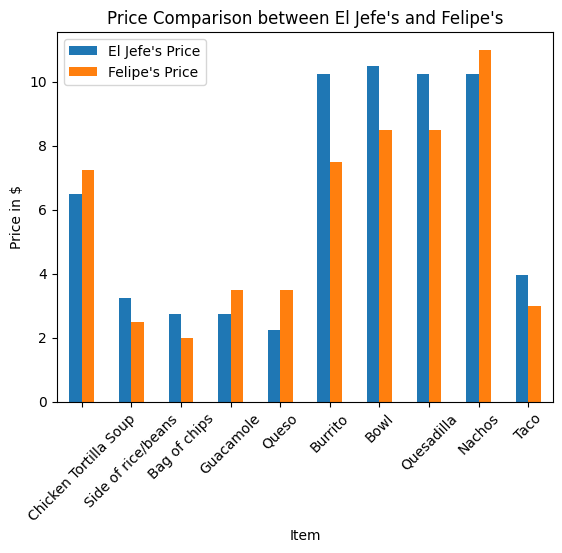

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Item': ['Chicken Tortilla Soup', 'Side of rice/beans', 'Bag of chips', 'Guacamole', 'Queso', 'Burrito', 'Bowl', 'Quesadilla', 'Nachos', 'Taco'],
    "El Jefe's Price": [6.5, 3.25, 2.75, 2.75, 2.25, 10.25, 10.5, 10.25, 10.25, 3.95],
    "Felipe's Price": [7.25, 2.5, 2, 3.5, 3.5, 7.5, 8.5, 8.5, 11, 3]
}

df = pd.DataFrame(data)

# Calculate price differences
df['Price Difference'] = df["El Jefe's Price"] - df["Felipe's Price"]

# Calculate average price difference
average_difference = df['Price Difference'].mean()
print("Average Price Difference (El Jefe's - Felipe's):", average_difference)

# Plotting
df.set_index('Item')[["El Jefe's Price", "Felipe's Price"]].plot(kind='bar')
plt.title('Price Comparison between El Jefe\'s and Felipe\'s')
plt.ylabel('Price in $')
plt.xticks(rotation=45)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d650185-6946-4ac8-95e9-ae296e150553' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>